IN3190 Prosjekt oppgave


In [19]:
#først importerer det jeg trenger:
import numpy as np
from numpy import pi, exp, sin, log10
import matplotlib.pyplot as plt

For det første oppgaven så skriver jeg en funksjon som konvolverer et input signal x(n) med en FIR filter h(n). Funksjonene skal returnere

In [2]:
def konvin3190(x,ylen,h):
    M, N = len(h), len(x)
    y = np.zeros(M+N-1)
    
    for m in range(1, M):
        for n in range(1,N):
            o = n+m-1
            y[o] = y[o] + x[n]*h[m]
            
    if ylen == 0: #needs to return out-signal with the length of 'x' signal
        a, b = int(np.floor(0.5*(M-1))), int(np.ceil(0.5*(M-1) +1))
        return y[b:int(M+N-1-a)]
    else:
        return y

Oppgave 1B: For den neste delen så skriver jeg en fuskjon 'frekspekin3190' som skal da ta inn signalet, og to parametere som bestemer hvor mange punkter til å sample og samplingsrekvensen. Funksjonen skal da returnere det komplekse frekvensspekteret og tilhørende frekvens 'f'. Etter det skal vi lage en funksjon som lager en liten filter som beskrevet i oppgave teksten.

In [5]:
def frekspekin3190(x, N, fs):
    X = np.zeros(N)
    w = np.linspace(0, pi, N)    #N-data punkter som omega(w)
    for i in range(N):
        for j in range(len(x)):
            X[i] = X[i] +x[j]*exp(-1J*w[i]*(j-1))
    f = (w*fs)/(2*pi) # radiener per sample

    return X, f

In [10]:
#filter funksjon 
def filter_h(size):
    return (1/5)*np.ones(size)

For den neste delen skal vi plotte frekvens spekteret |H (ejω)| til h[n], |X (ejω)|og |Y (ejω)|til x[n], og y[n] = h[n] ∗x[n] i samme plott.

In [14]:
#oppgave 1c plott 
#verdier bestemt av ooppgave teksten:
f1, f2 = 10, 20                 #Hz
fs = 100                        #Hz
t_len = 5                       #sekunder 
t = np.linspace(0, t_len, fs)   #tidsarray
h = filter_h(4)                 #filter
x = sin(2*pi*f1*t) + sin(2*pi*f2*t)   #x[n] signal

#regner fram det vi skal plotte
y_sig = konvin3190(x,0, h)  #får fram y(n) ved å konolvere x(n) og h(n)
N = 1000

H, hf = frekspekin3190(h, N, fs)
X, fx = frekspekin3190(x, N, fs)
Y, fy = frekspekin3190(y_sig, N, fs)

<ipython-input-5-3b2093e3a37f>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i] +x[j]*exp(-1J*w[i]*(j-1))


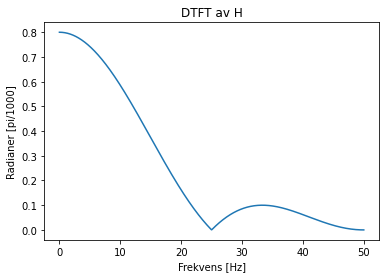

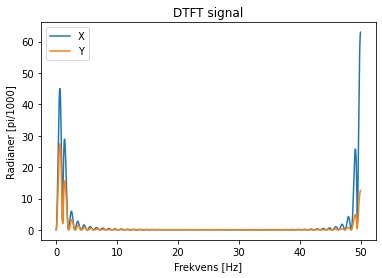

In [16]:
#plotter H først
plt.plot(hf, abs(H))
plt.title("DTFT av H")
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Radianer [pi/1000]")
plt.show()

#plotter X og Y 
plt.plot(fx, abs(X), fy, abs(Y))
#plot(f2, abs(Y))
plt.title("DTFT av X og Y")
plt.legend(["X", "Y"])
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Radianer [pi/1000]")
plt.show()



Oppgave 2:
for den neste delen skal vi jobbe med støy fjerning

In [17]:
#oppgave 2a FIR lav-pass filtere 
h1 = [0.0002, 0.0001, -0.0001, -0.0005, -0.0011, -0.0017, -0.0019, 
    -0.0016, -0.0005, 0.0015, 0.0040, 0.0064, 0.0079, 0.0075, 0.0046, 
    -0.0009, -0.0084, -0.0164, -0.0227, -0.0248, -0.0203, -0.0079, 
    0.0127, 0.0400, 0.0712, 0.1021, 0.1284, 0.1461, 0.1523, 0.1461, 
    0.1284, 0.1021, 0.0712, 0.0400, 0.0127, -0.0079, -0.0203, -0.0248, 
    -0.0227, -0.0164, -0.0084, -0.0009, 0.0046, 0.0075, 0.0079, 0.0064, 
    0.0040, 0.0015, -0.0005, -0.0016, -0.0019, -0.0017, -0.0011, 
    -0.0005, -0.0001, 0.0001, 0.0002]

h2 = [-0.0002, -0.0001, 0.0003, 0.0005, -0.0001, -0.0009, -0.0007, 
    0.0007, 0.0018, 0.0005, -0.0021, -0.0027, 0.0004, 0.0042, 0.0031, 
    -0.0028, -0.0067, -0.0023, 0.0069, 0.0091, -0.0010, -0.0127, 
    -0.0100, 0.0077, 0.0198, 0.0075, -0.0193, -0.0272, 0.0014, 0.0386, 
    0.0338, -0.0246, -0.0771, -0.0384, 0.1128, 0.2929, 0.3734, 0.2929, 
    0.1128, -0.0384, -0.0771, -0.0246, 0.0338, 0.0386, 0.0014, -0.0272, 
    -0.0193, 0.0075, 0.0198, 0.0077, -0.0100, -0.0127, -0.0010, 0.0091, 
    0.0069, -0.0023, -0.0067, -0.0028, 0.0031, 0.0042, 0.0004, -0.0027, 
    -0.0021, 0.0005, 0.0018, 0.0007, -0.0007, -0.0009, -0.0001, 0.0005, 
    0.0003, -0.0001, -0.0002]

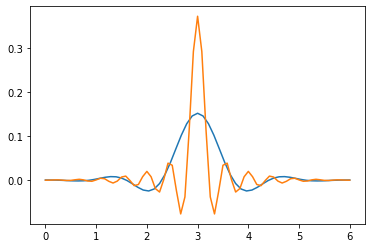

In [18]:
#oppgave 2a plotter filter over tid
time_h1 = np.linspace(0, 6, len(h1))
time_h2 = np.linspace(0, 6, len(h2))

plt.plot(time_h1, h1, time_h2, h2)
plt.leged(['filter 1', 'filter 2'])
plt.ylabel('Tid [s]')
plt.xlabel('filter amplitude')
plt.show()


<ipython-input-5-3b2093e3a37f>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i] +x[j]*exp(-1J*w[i]*(j-1))


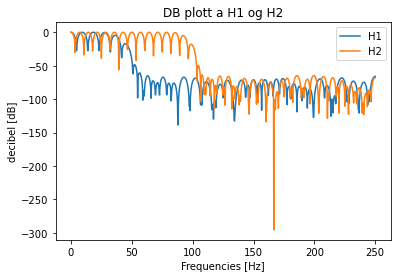

In [29]:
#plotter i frekensspekter i DB
#plotter i DB
N = 1000
fs = 500

H1, H1f = frekspekin3190(h1,N, fs)
H2, H2f= frekspekin3190(h2, N, fs)

Hdb1 = 20*log10(abs(H1))
Hdb2 = 20*log10(abs(H2))

plt.plot(H1f, Hdb1, H2f, Hdb2)
plt.legend(['H1', 'H2'])
plt.title('DB plott a H1 og H2')
plt.xlabel("Frekvens [Hz]")
plt.ylabel("desibel [dB]")
plt.show()